**Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2


**Loading and Preprocess Image**

In [5]:
def preprocess_image(image_path,target_size=(48,48)):
    img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,target_size)
    img=img/255.0
    img=np.expand_dims(img,axis=[0,-1])
    return img

In [6]:
images = glob("test/**/**")
image_paths = [img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
if len(image_paths) == 0:
    raise FileNotFoundError("No images found in the 'train' directory.")

image_path = image_paths[0]
img_tensor=preprocess_image(image_path)

**Defining CNN Model**

In [7]:
def create_cnn_model():
    inputs = Input(shape=(48,48,1))
    x=Conv2D(32,(3,3),activation='relu',name='conv1')(inputs)
    x=MaxPooling2D((2,2))(x)
    x=Conv2D(64,(3,3),activation='relu',name='conv2')(x)
    x=MaxPooling2D((2,2))(x)
    x=Flatten()(x)
    x=Dense(64,activation='relu')(x)
    
    outputs=Dense(3,activation='softmax')(x)

    model=Model(inputs, outputs)
    return model

**Create and Compile the Model**

In [15]:
model=create_cnn_model()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.save("emotion_cnn_model.h5")

**Intermediate Model to get Activation from Choosen**

In [16]:
layer_name='conv2'
intermediate_model=Model(inputs=model.input, outputs=model.get_layer(layer_name).output)


**Activation Maps**

In [17]:
activation_maps=intermediate_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


In [18]:
n_filters = activation_maps.shape[-1]

**Visualize the Model**

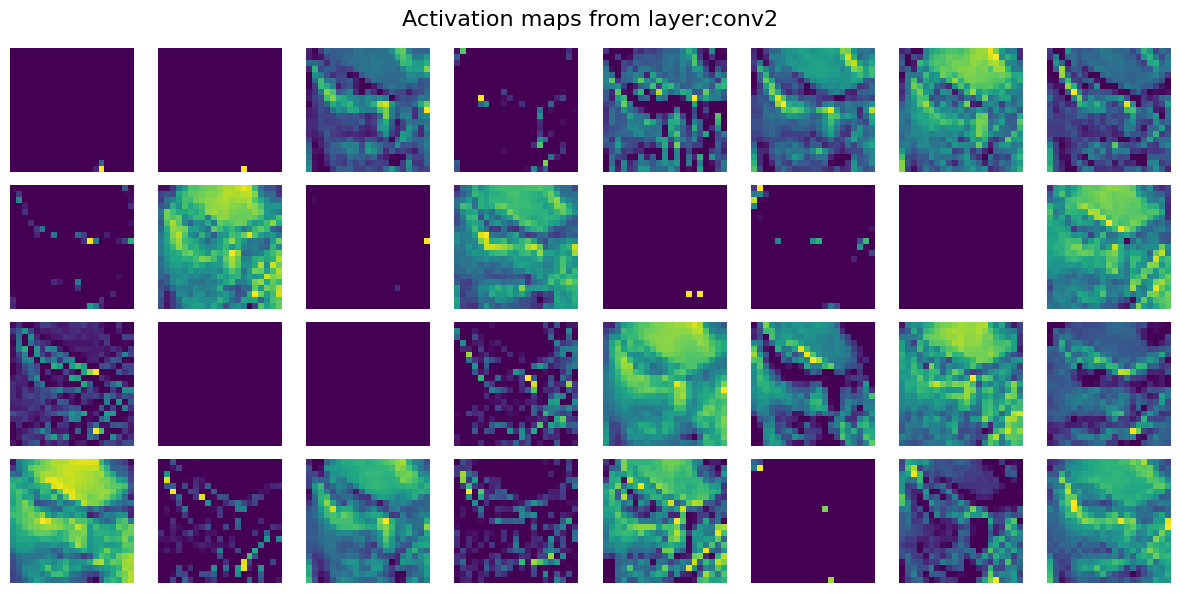

In [19]:
fig, axes=plt.subplots(4,8, figsize=(12,6))

for i in range(32):
    row = i//8
    column=i%8
    ax=axes[row,column]
    ax.imshow(activation_maps[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.suptitle(f'Activation maps from layer:{layer_name}', fontsize = 16)
plt.tight_layout()
plt.show()

In [20]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)